## 1. Read 영향변수들 in 각 시군

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_seoul_ori = pd.read_excel("특별시 및 광역시 종합.xlsx", sheet_name="서울특별시")
df_seoul_ori.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,지역,코드,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,서울특별시,11,지역성,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,일시,계절성,NaN,NaN,NaN,NaN,NaN,NaN
2,연도,월,총인구수(명),세대수(개),세대당 인구(명),남자 인구수(명),여자 인구수(명),남여 비율(남/여),65세 이상\n고령화비율(%),전력사용량(kWh),...,기압\n평균현지기압(hPa),NaN,년월일,평균 기온(°C),일합강수량(mm),습도\n평균상대습도(%),일조량\n합계 일조시간(hr),지중온도\n평균지면온도(°C),풍량\n평균풍속(m/s),기압\n평균현지기압(hPa)
3,2001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1012.9,NaN,2001-01-01 00:00:00,-4.5,1.2,63.5,2.6,-3.7,1.7,1006.3
4,2001,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1013.3,NaN,2001-01-02 00:00:00,-4.3,NaN,59,0,-2.4,2.8,1007.9


### Read City Name and Code

In [3]:
city_name = df_seoul_ori.iloc[1, 0]
city_code = df_seoul_ori.iloc[1, 1]
city_name, city_code

('서울특별시', 11)

## 2. 영향변수를 Columns으로 Pandas Dataframe 만들기

In [4]:
df_seoul = pd.read_excel("특별시 및 광역시 종합.xlsx", sheet_name="서울특별시", header=3)
df_seoul

,연도,월,총인구수(명),세대수(개),세대당 인구(명),남자 인구수(명),여자 인구수(명),남여 비율(남/여),65세 이상\n고령화비율(%),전력사용량(kWh),...,기압\n평균현지기압(hPa),Unnamed: 29,년월일,평균 기온(°C).1,일합강수량(mm),습도\n평균상대습도(%).1,일조량\n합계 일조시간(hr).1,지중온도\n평균지면온도(°C).1,풍량\n평균풍속(m/s).1,기압\n평균현지기압(hPa).1
0,2001.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1012.9,NaN,2001-01-01,-4.5,1.2,63.5,2.6,-3.7,1.7,1006.3
1,2001.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1013.3,NaN,2001-01-02,-4.3,NaN,59.0,0.0,-2.4,2.8,1007.9
2,2001.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1004.8,NaN,2001-01-03,-8.3,NaN,46.5,5.3,-6.1,2.7,1014.2
3,2001.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1005.1,NaN,2001-01-04,-9.8,NaN,46.1,4.6,-7.6,2.5,1019.1
4,2001.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1000.2,NaN,2001-01-05,-6.8,0.0,56.4,2.4,-6.5,1.4,1023.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2021-12-27,-7.6,0.0,60.9,3.8,-4.7,1.7,1020.0
7666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2021-12-28,-4.1,NaN,73.8,1.7,-3.3,2.2,1016.9
7667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2021-12-29,0.4,0.2,72.9,1.8,-0.7,2.6,1009.0
7668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2021-12-30,-3.9,0.0,48.5,7.3,-2.7,3.3,1014.5


1. 연도 및 월을 Date형태로 바꾸기
2. 데이터별 컬럼선택하기 
3. 데이터별 기간 파악하기: Start ~ End (Graph)? 

In [5]:
last_nan = np.isnan(df_seoul['연도'].values).argmax(axis=0)
last_nan

252

### "date" 컬럼으로 년과 월별 자료를 datetime index 포맷으로 변경하기

In [6]:
df_seoul['date'] = df_seoul['연도'][0:last_nan].astype(np.int64).astype(str) + '-' + df_seoul['월'][0:last_nan].astype(np.int64).astype(str)
df_seoul.index = pd.to_datetime(df_seoul['date'])
df_seoul.resample('M').last()
df_seoul

,연도,월,총인구수(명),세대수(개),세대당 인구(명),남자 인구수(명),여자 인구수(명),남여 비율(남/여),65세 이상\n고령화비율(%),전력사용량(kWh),...,Unnamed: 29,년월일,평균 기온(°C).1,일합강수량(mm),습도\n평균상대습도(%).1,일조량\n합계 일조시간(hr).1,지중온도\n평균지면온도(°C).1,풍량\n평균풍속(m/s).1,기압\n평균현지기압(hPa).1,date
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,2001.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2001-01-01,-4.5,1.2,63.5,2.6,-3.7,1.7,1006.3,2001-1
2001-02-01,2001.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2001-01-02,-4.3,NaN,59.0,0.0,-2.4,2.8,1007.9,2001-2
2001-03-01,2001.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2001-01-03,-8.3,NaN,46.5,5.3,-6.1,2.7,1014.2,2001-3
2001-04-01,2001.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2001-01-04,-9.8,NaN,46.1,4.6,-7.6,2.5,1019.1,2001-4
2001-05-01,2001.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2001-01-05,-6.8,0.0,56.4,2.4,-6.5,1.4,1023.1,2001-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2021-12-27,-7.6,0.0,60.9,3.8,-4.7,1.7,1020.0,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2021-12-28,-4.1,NaN,73.8,1.7,-3.3,2.2,1016.9,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2021-12-29,0.4,0.2,72.9,1.8,-0.7,2.6,1009.0,NaN


In [7]:
df_seoul_f = df_seoul.iloc[0:last_nan, 2:29]
df_seoul_f

,총인구수(명),세대수(개),세대당 인구(명),남자 인구수(명),여자 인구수(명),남여 비율(남/여),65세 이상\n고령화비율(%),전력사용량(kWh),산업체 수(개),산업체 규모(개)\n100인 이상 사업장,...,취업률\n고용보험자 비율\n(피보험자/총인구),취약계층(개)\n장애인포함가구,취약계층(비율)\n장애인포함가구,평균 기온(°C),월합강수량(mm),습도\n평균상대습도(%),일조량\n합계 일조시간(hr),지중온도\n평균지면온도(°C),풍량\n평균풍속(m/s),기압\n평균현지기압(hPa)
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-4.1,39.4,62.0,97.0,-3.6,2.2,1012.9
2001-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.3,45.7,60.0,117.0,-0.2,2.1,1013.3
2001-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,18.1,51.0,151.0,5.4,2.8,1004.8
2001-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.6,12.3,50.0,177.8,15.4,2.5,1005.1
2001-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,19.1,16.5,61.0,163.1,22.7,2.1,1000.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,9550227.0,4416816.0,2.162242,4640740.0,4909487.0,0.945260,16.5,5.103868e+09,518938.0,5260.0,...,0.464023,81990.0,0.018563,25.9,211.2,74.0,127.3,28.2,2.1,998.6
2021-09-01,9542256.0,4421143.0,2.158323,4636069.0,4906187.0,0.944943,16.6,4.145083e+09,509936.0,5260.0,...,0.466638,82119.0,0.018574,22.6,131.0,71.0,182.0,24.6,2.3,1003.4
2021-10-01,9532428.0,4422587.0,2.155396,4630630.0,4901798.0,0.944680,16.7,3.578614e+09,520056.0,5266.0,...,0.469176,82328.0,0.018615,15.6,57.0,70.0,168.4,16.7,2.1,1011.0


In [8]:
df_seoul_f.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2001-01-01 to 2021-12-01
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   총인구수(명)                            168 non-null    float64
 1   세대수(개)                             168 non-null    float64
 2   세대당 인구(명)                          168 non-null    float64
 3   남자 인구수(명)                          168 non-null    float64
 4   여자 인구수(명)                          168 non-null    float64
 5   남여 비율(남/여)                         168 non-null    float64
 6   65세 이상
고령화비율(%)                    168 non-null    float64
 7   전력사용량(kWh)                         240 non-null    float64
 8   산업체 수(개)                           180 non-null    float64
 9   산업체 규모(개)
100인 이상 사업장              180 non-null    float64
 10  산업단지면적(㎡)                          241 non-null    float64
 11  연간 가계소득
주민1인당 자체수입액(천원)            252 

In [9]:
df_seoul_f.describe()

,총인구수(명),세대수(개),세대당 인구(명),남자 인구수(명),여자 인구수(명),남여 비율(남/여),65세 이상\n고령화비율(%),전력사용량(kWh),산업체 수(개),산업체 규모(개)\n100인 이상 사업장,...,취업률\n고용보험자 비율\n(피보험자/총인구),취약계층(개)\n장애인포함가구,취약계층(비율)\n장애인포함가구,평균 기온(°C),월합강수량(mm),습도\n평균상대습도(%),일조량\n합계 일조시간(hr),지중온도\n평균지면온도(°C),풍량\n평균풍속(m/s),기압\n평균현지기압(hPa)
count,1.680000e+02,1.680000e+02,168.000000,1.680000e+02,1.680000e+02,168.000000,168.000000,2.400000e+02,180.000000,180.000000,...,168.000000,108.000000,108.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.001952e+07,4.217975e+06,2.377514,4.931634e+06,5.087883e+06,0.969089,12.169048,3.770575e+09,416768.422222,4979.488889,...,0.388216,62932.055556,0.014742,12.933730,116.784921,60.769841,179.157540,14.238492,2.347222,1005.948016
std,2.253997e+05,9.234473e+04,0.099652,1.439320e+05,8.195161e+04,0.013110,2.460051,4.371923e+08,66031.811597,386.217490,...,0.046792,9942.913696,0.002025,9.969636,166.437911,8.422757,49.733184,10.780789,0.420340,6.440902
min,9.509458e+06,4.054493e+06,2.148541,4.618040e+06,4.891418e+06,0.944111,8.300000,2.844225e+09,316963.000000,4076.000000,...,0.306588,51014.000000,0.012209,-7.200000,0.000000,43.000000,34.300000,-4.700000,1.000000,994.700000
25%,9.812171e+06,4.182342e+06,2.313056,4.801640e+06,5.010531e+06,0.958310,9.975000,3.441126e+09,346211.000000,4594.250000,...,0.345738,53109.750000,0.012647,3.900000,24.475000,55.000000,153.000000,3.800000,2.100000,999.475000
50%,1.010486e+07,4.195255e+06,2.408376,4.979646e+06,5.125579e+06,0.971784,12.050000,3.690878e+09,426788.500000,5147.500000,...,0.388353,59744.500000,0.014183,14.050000,56.600000,59.500000,181.500000,15.350000,2.350000,1006.550000
75%,1.020632e+07,4.242082e+06,2.443871,5.062162e+06,5.150921e+06,0.981169,14.125000,4.093453e+09,476176.250000,5298.500000,...,0.430562,71032.000000,0.016468,22.250000,138.775000,66.250000,210.075000,24.625000,2.600000,1011.725000
max,1.032892e+07,4.427814e+06,2.516136,5.120401e+06,5.208514e+06,0.986706,16.800000,5.394746e+09,527480.000000,5455.000000,...,0.471206,83072.000000,0.018769,28.800000,1131.000000,85.000000,314.000000,31.900000,3.500000,1016.800000


In [10]:
df_seoul_index= df_seoul_f.iloc[84:]
df_seoul_index

,총인구수(명),세대수(개),세대당 인구(명),남자 인구수(명),여자 인구수(명),남여 비율(남/여),65세 이상\n고령화비율(%),전력사용량(kWh),산업체 수(개),산업체 규모(개)\n100인 이상 사업장,...,취업률\n고용보험자 비율\n(피보험자/총인구),취약계층(개)\n장애인포함가구,취약계층(비율)\n장애인포함가구,평균 기온(°C),월합강수량(mm),습도\n평균상대습도(%),일조량\n합계 일조시간(hr),지중온도\n평균지면온도(°C),풍량\n평균풍속(m/s),기압\n평균현지기압(hPa)
date,,,,,,,,,,,,,,,,,,,,,
2008-01-01,10201656.0,4054493.0,2.516136,5066697.0,5134959.0,0.986706,8.3,4.398183e+09,338560.0,4292.0,...,0.306588,NaN,NaN,-1.7,17.7,50.0,166.5,-1.8,2.3,1015.5
2008-02-01,10212056.0,4063444.0,2.513153,5071730.0,5140326.0,0.986655,8.4,4.168168e+09,332702.0,4285.0,...,0.309722,NaN,NaN,-1.2,15.0,46.0,224.2,0.1,2.7,1014.2
2008-03-01,10206136.0,4064117.0,2.511280,5068143.0,5137993.0,0.986405,8.4,3.624186e+09,331704.0,4400.0,...,0.309099,NaN,NaN,7.3,53.9,56.0,187.3,8.0,2.6,1007.9
2008-04-01,10206862.0,4070294.0,2.507647,5068738.0,5138124.0,0.986496,8.5,3.719082e+09,323462.0,4426.0,...,0.311170,NaN,NaN,14.1,38.5,50.0,208.1,15.2,2.7,1005.0
2008-05-01,10204867.0,4074917.0,2.504313,5067660.0,5137207.0,0.986462,8.5,3.426951e+09,325880.0,4461.0,...,0.313009,NaN,NaN,17.7,97.7,58.0,213.8,20.5,2.7,1000.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,9550227.0,4416816.0,2.162242,4640740.0,4909487.0,0.945260,16.5,5.103868e+09,518938.0,5260.0,...,0.464023,81990.0,0.018563,25.9,211.2,74.0,127.3,28.2,2.1,998.6
2021-09-01,9542256.0,4421143.0,2.158323,4636069.0,4906187.0,0.944943,16.6,4.145083e+09,509936.0,5260.0,...,0.466638,82119.0,0.018574,22.6,131.0,71.0,182.0,24.6,2.3,1003.4
2021-10-01,9532428.0,4422587.0,2.155396,4630630.0,4901798.0,0.944680,16.7,3.578614e+09,520056.0,5266.0,...,0.469176,82328.0,0.018615,15.6,57.0,70.0,168.4,16.7,2.1,1011.0


In [11]:
df_seoul_index.columns[df_seoul_index.isnull().any()]

Index(['연간 학력수준\n고등학교 졸업(명)', '연간 학력수준\n고등학교 졸업자 비율\n(졸업자/만18세 인구)',
       '취약계층(개)\n장애인포함가구', '취약계층(비율)\n장애인포함가구'],
      dtype='object')

In [12]:
df_seoul_apply = df_seoul_index.drop(df_seoul_index.columns[df_seoul_index.isnull().any()], axis=1)
df_seoul_apply

,총인구수(명),세대수(개),세대당 인구(명),남자 인구수(명),여자 인구수(명),남여 비율(남/여),65세 이상\n고령화비율(%),전력사용량(kWh),산업체 수(개),산업체 규모(개)\n100인 이상 사업장,...,연간 평균 수입대비 인건비(%),취업률(명)\n고용보험자수,취업률\n고용보험자 비율\n(피보험자/총인구),평균 기온(°C),월합강수량(mm),습도\n평균상대습도(%),일조량\n합계 일조시간(hr),지중온도\n평균지면온도(°C),풍량\n평균풍속(m/s),기압\n평균현지기압(hPa)
date,,,,,,,,,,,,,,,,,,,,,
2008-01-01,10201656.0,4054493.0,2.516136,5066697.0,5134959.0,0.986706,8.3,4.398183e+09,338560.0,4292.0,...,44.276923,3127710.0,0.306588,-1.7,17.7,50.0,166.5,-1.8,2.3,1015.5
2008-02-01,10212056.0,4063444.0,2.513153,5071730.0,5140326.0,0.986655,8.4,4.168168e+09,332702.0,4285.0,...,44.276923,3162899.0,0.309722,-1.2,15.0,46.0,224.2,0.1,2.7,1014.2
2008-03-01,10206136.0,4064117.0,2.511280,5068143.0,5137993.0,0.986405,8.4,3.624186e+09,331704.0,4400.0,...,44.276923,3154705.0,0.309099,7.3,53.9,56.0,187.3,8.0,2.6,1007.9
2008-04-01,10206862.0,4070294.0,2.507647,5068738.0,5138124.0,0.986496,8.5,3.719082e+09,323462.0,4426.0,...,44.276923,3176071.0,0.311170,14.1,38.5,50.0,208.1,15.2,2.7,1005.0
2008-05-01,10204867.0,4074917.0,2.504313,5067660.0,5137207.0,0.986462,8.5,3.426951e+09,325880.0,4461.0,...,44.276923,3194211.0,0.313009,17.7,97.7,58.0,213.8,20.5,2.7,1000.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,9550227.0,4416816.0,2.162242,4640740.0,4909487.0,0.945260,16.5,5.103868e+09,518938.0,5260.0,...,52.561538,4431526.0,0.464023,25.9,211.2,74.0,127.3,28.2,2.1,998.6
2021-09-01,9542256.0,4421143.0,2.158323,4636069.0,4906187.0,0.944943,16.6,4.145083e+09,509936.0,5260.0,...,52.561538,4452777.0,0.466638,22.6,131.0,71.0,182.0,24.6,2.3,1003.4
2021-10-01,9532428.0,4422587.0,2.155396,4630630.0,4901798.0,0.944680,16.7,3.578614e+09,520056.0,5266.0,...,52.561538,4472386.0,0.469176,15.6,57.0,70.0,168.4,16.7,2.1,1011.0


## 3. 종속변수를 Columns으로 Pandas Dataframe 만들기

In [13]:
df_water_supply = pd.read_excel("01_(종합)종속변수 데이터.xlsx", sheet_name="종합(도별 정렬)", header=1)
df_water_supply

,지자체명,합계,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종자치시,...,거제시,양산시,의령군,함안군,창녕군,고성군,남해군,하동군,거창군,합천군
0,공급량,174574525627,26155911110,12657436646,8321839624,12149134791,4594344823,4551714892,15537564917,450446006,...,730782212,800311499,10098209,2437701532,142348474,162403860,57128669,44662981,153292,53220266
1,1991-01,269270087,81060537,37757242,26300028,29418570,0,155145,13054382,551213,...,752169,0,0,0,0,118569,0,0,0,0
2,1991-02,443838486,69783046,34866160,21383029,26648420,0,115452,218350190,503895,...,670850,0,0,0,0,134968,0,0,0,0
3,1991-03,257497782,76338510,36913445,21749105,28197330,0,81113,13549813,584119,...,783766,0,0,0,0,154918,0,0,5808,0
4,1991-04,260073617,77152820,37547343,24158871,27937460,0,121198,13201308,772991,...,773985,0,0,0,0,159361,0,0,2274,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2021-08,641836516,72429478,32979655,25392258,30465082,18009879,19742588,47834080,2137755,...,3247784,4164768,96485,7423926,752773,734655,464884,221196,0,354784
369,2021-09,598228629,65857195,32068574,23737665,28503038,16961489,18272102,42215682,2053875,...,3031153,3913821,110977,7021898,702805,653851,401595,193413,0,345142
370,2021-10,603297791,62968217,30900326,22951433,28326439,17456969,17609898,44913095,1967750,...,3047318,3884221,81279,7023299,707458,687379,378490,140955,0,334682
371,2021-11,607501296,67368712,33323916,24198779,28791350,16128937,19424311,48940143,1893403,...,2853932,3879231,91738,6792639,642462,647926,356625,144432,0,316062


In [14]:
df_water_supply_seoul = df_water_supply.set_index("지자체명")
df_water_supply_seoul

,합계,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종자치시,수원시,...,거제시,양산시,의령군,함안군,창녕군,고성군,남해군,하동군,거창군,합천군
지자체명,,,,,,,,,,,,,,,,,,,,,
공급량,174574525627,26155911110,12657436646,8321839624,12149134791,4594344823,4551714892,15537564917,450446006,3721126421,...,730782212,800311499,10098209,2437701532,142348474,162403860,57128669,44662981,153292,53220266
1991-01,269270087,81060537,37757242,26300028,29418570,0,155145,13054382,551213,6162446,...,752169,0,0,0,0,118569,0,0,0,0
1991-02,443838486,69783046,34866160,21383029,26648420,0,115452,218350190,503895,5482199,...,670850,0,0,0,0,134968,0,0,0,0
1991-03,257497782,76338510,36913445,21749105,28197330,0,81113,13549813,584119,6007514,...,783766,0,0,0,0,154918,0,0,5808,0
1991-04,260073617,77152820,37547343,24158871,27937460,0,121198,13201308,772991,6139211,...,773985,0,0,0,0,159361,0,0,2274,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08,641836516,72429478,32979655,25392258,30465082,18009879,19742588,47834080,2137755,12715317,...,3247784,4164768,96485,7423926,752773,734655,464884,221196,0,354784
2021-09,598228629,65857195,32068574,23737665,28503038,16961489,18272102,42215682,2053875,12081623,...,3031153,3913821,110977,7021898,702805,653851,401595,193413,0,345142
2021-10,603297791,62968217,30900326,22951433,28326439,17456969,17609898,44913095,1967750,12352087,...,3047318,3884221,81279,7023299,707458,687379,378490,140955,0,334682


In [15]:
df_water_supply_seoul_f = df_water_supply_seoul.iloc[205:, 1:2]
df_water_supply_seoul_f

,서울특별시
지자체명,
2008-01,61539940
2008-02,55286670
2008-03,58944363
2008-04,60513525
2008-05,60265137
...,...
2021-08,72429478
2021-09,65857195
2021-10,62968217


In [16]:
df_seoul_apply["water_supply"] = df_water_supply_seoul_f["서울특별시"].values

In [17]:
seoul_df = df_seoul_apply
seoul_df

,총인구수(명),세대수(개),세대당 인구(명),남자 인구수(명),여자 인구수(명),남여 비율(남/여),65세 이상\n고령화비율(%),전력사용량(kWh),산업체 수(개),산업체 규모(개)\n100인 이상 사업장,...,취업률(명)\n고용보험자수,취업률\n고용보험자 비율\n(피보험자/총인구),평균 기온(°C),월합강수량(mm),습도\n평균상대습도(%),일조량\n합계 일조시간(hr),지중온도\n평균지면온도(°C),풍량\n평균풍속(m/s),기압\n평균현지기압(hPa),water_supply
date,,,,,,,,,,,,,,,,,,,,,
2008-01-01,10201656.0,4054493.0,2.516136,5066697.0,5134959.0,0.986706,8.3,4.398183e+09,338560.0,4292.0,...,3127710.0,0.306588,-1.7,17.7,50.0,166.5,-1.8,2.3,1015.5,61539940
2008-02-01,10212056.0,4063444.0,2.513153,5071730.0,5140326.0,0.986655,8.4,4.168168e+09,332702.0,4285.0,...,3162899.0,0.309722,-1.2,15.0,46.0,224.2,0.1,2.7,1014.2,55286670
2008-03-01,10206136.0,4064117.0,2.511280,5068143.0,5137993.0,0.986405,8.4,3.624186e+09,331704.0,4400.0,...,3154705.0,0.309099,7.3,53.9,56.0,187.3,8.0,2.6,1007.9,58944363
2008-04-01,10206862.0,4070294.0,2.507647,5068738.0,5138124.0,0.986496,8.5,3.719082e+09,323462.0,4426.0,...,3176071.0,0.311170,14.1,38.5,50.0,208.1,15.2,2.7,1005.0,60513525
2008-05-01,10204867.0,4074917.0,2.504313,5067660.0,5137207.0,0.986462,8.5,3.426951e+09,325880.0,4461.0,...,3194211.0,0.313009,17.7,97.7,58.0,213.8,20.5,2.7,1000.1,60265137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,9550227.0,4416816.0,2.162242,4640740.0,4909487.0,0.945260,16.5,5.103868e+09,518938.0,5260.0,...,4431526.0,0.464023,25.9,211.2,74.0,127.3,28.2,2.1,998.6,72429478
2021-09-01,9542256.0,4421143.0,2.158323,4636069.0,4906187.0,0.944943,16.6,4.145083e+09,509936.0,5260.0,...,4452777.0,0.466638,22.6,131.0,71.0,182.0,24.6,2.3,1003.4,65857195
2021-10-01,9532428.0,4422587.0,2.155396,4630630.0,4901798.0,0.944680,16.7,3.578614e+09,520056.0,5266.0,...,4472386.0,0.469176,15.6,57.0,70.0,168.4,16.7,2.1,1011.0,62968217


## 4. 분석

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
seoul_df.columns[0:-1]

Index(['총인구수(명)', '세대수(개)', '세대당 인구(명)', '남자 인구수(명)', '여자 인구수(명)',
       '남여 비율(남/여)', '65세 이상\n고령화비율(%)', '전력사용량(kWh)', '산업체 수(개)',
       '산업체 규모(개)\n100인 이상 사업장', '산업단지면적(㎡)', '연간 가계소득\n주민1인당 자체수입액(천원)',
       '연간 인건비(천원)', '연간 평균 수입대비 인건비(%)', '취업률(명)\n고용보험자수',
       '취업률\n고용보험자 비율\n(피보험자/총인구)', '평균 기온(°C)', '월합강수량(mm)', '습도\n평균상대습도(%)',
       '일조량\n합계 일조시간(hr)', '지중온도\n평균지면온도(°C)', '풍량\n평균풍속(m/s)',
       '기압\n평균현지기압(hPa)'],
      dtype='object')

In [20]:
plt.rcParams['font.family'] = 'NanumGothic'

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


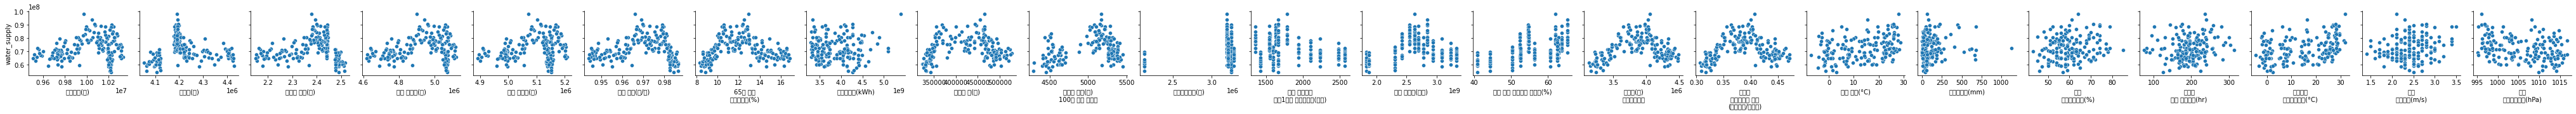

In [21]:
pp = sns.pairplot(data=seoul_df,
                  y_vars=['water_supply'],
                  x_vars=seoul_df.columns[0:-1])

In [22]:
import statsmodels.api as sm

In [23]:
X = seoul_df["총인구수(명)"]
y = seoul_df["water_supply"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           water_supply   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.180e+04
Date:                Tue, 02 Aug 2022   Prob (F-statistic):                   7.37e-157
Time:                        17:29:55   Log-Likelihood:                         -2920.3
No. Observations:                 168   AIC:                                      5843.
Df Residuals:                     167   BIC:                                      5846.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
총인구수(명)        7.1874      0.066    108.644      0.000       7.057       7.318
==============================================================================
Omnibus:                        1.606   Durbin-Watson:                   0.673
Prob(Omnibus):                  0.448   Jarque-Bera (JB):                1.628
Skew:                           0.231   Prob(JB):                        0.443
Kurtosis:                       2.864   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

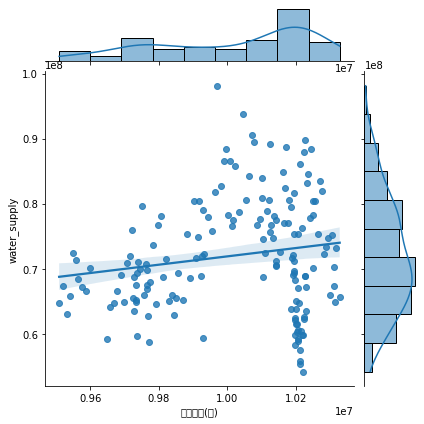

In [24]:
sns.jointplot(x="총인구수(명)", y="water_supply", data=seoul_df, kind="reg");

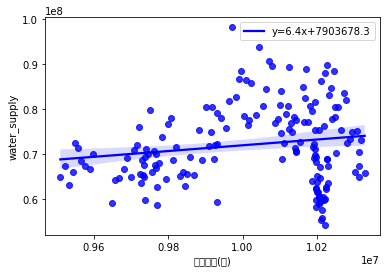

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#tips = sns.load_dataset("tips")

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(seoul_df['총인구수(명)'],seoul_df['water_supply'])

# use line_kws to set line label for legend
ax = sns.regplot(x="총인구수(명)", y="water_supply", data=seoul_df, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()